# Practica 5

In [1]:
from deap import creator, tools, base, algorithms
import numpy as np
import random


class Tren:
    def __init__(self, numero_vagones, operacion, matricula):
        self.numero_vagones = numero_vagones
        self.operacion = operacion
        self.matricula = matricula

    def __str__(self):
        return "Número de vagones: " + str(self.numero_vagones) + "\n" + \
        "Muelle de operaciones: " + str(self.operacion) + "\n" + \
                "Matrícula: " + str(self.matricula) + "\n"

    


def producir_lista_trenes_aleatoria(n, min_vagones, max_vagones):
    lista_trenes = []
    for i in range(n):
        numero_vagones = random.randint(min_vagones, max_vagones)
        operacion = random.choice(["gas", "carbón", "contenedores"])
        lista_trenes.append(Tren(numero_vagones, operacion, i))
    return lista_trenes


def crear_cola_de_trenes(lista_de_trenes):
    auxiliar = lista_de_trenes
    random.shuffle(auxiliar)
    return auxiliar


class Cola_de_trenes(list):
    def __init__(self, lista_de_trenes, create = True):
        if create:
            list.extend(self,crear_cola_de_trenes(lista_de_trenes))
        else:
            list.extend(self, lista_de_trenes)

    def __str__(self):
        cadena = ""
        for i in list(self):
            cadena += (str(i) + "\n")
        return cadena

random.seed(2024)

In [2]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))

creator.create("Individual", Cola_de_trenes, fitness=creator.FitnessMin)

In [3]:
toolbox = base.Toolbox()

# Crear individuos
toolbox.register("individual", creator.Individual, producir_lista_trenes_aleatoria(50, 10, 30))
toolbox.register("individual_mate", creator.Individual)

toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [4]:

def tiempo_total(indiv):
    sum = 0 
    for tren in indiv:
        sum += tren.numero_vagones

    return sum


def evaluar_cola(individuo):
    
    muelle_gas = 1
    muelle_carbon = 1
    muelle_contenedores = 1
    id_tren = 0

    
    for i in range(tiempo_total(individuo)):
        muelle_gas -= 1
        muelle_carbon -= 1
        muelle_contenedores -= 1
        
        if id_tren >= len(individuo) and muelle_carbon <= 0 and muelle_contenedores <= 0 and muelle_gas <= 0:
            break
        
        for _ in range(3):
            
            if id_tren >= len(individuo):
                break

            if individuo[id_tren].operacion == "carbón" and muelle_carbon <= 0:
                muelle_carbon = individuo[id_tren].numero_vagones
                id_tren += 1
                continue
            if individuo[id_tren].operacion == "contenedores" and muelle_contenedores <= 0:
                muelle_contenedores = individuo[id_tren].numero_vagones
                id_tren += 1
                continue
                
            if individuo[id_tren].operacion == "gas" and muelle_gas <= 0:
                muelle_gas = individuo[id_tren].numero_vagones
                id_tren += 1
                continue

        continue
    return i,


In [5]:
def train_swap(indivuduo, indpb):
    if random.random() < indpb:
        pos1 = random.randint(0, len(indivuduo) - 1)
        pos2 = random.randint(0, len(indivuduo) - 1)
        
        train1 = indivuduo[pos1]
        train2 = indivuduo[pos2]
        indivuduo[pos1] = train2
        indivuduo[pos2] = train1
        
    return indivuduo,

In [6]:
from copy import deepcopy

def trains_mate(indv1, indv2):
    cut = random.randint(0, len(indv1) - 1)
    
    f_half_new_invd1 = indv1[:cut]
    f_half_new_invd2 = indv1[cut:]
    
    l_half_new_invd1 = deepcopy(indv2)
    l_half_new_invd2 = []
    
    for train1 in f_half_new_invd1:
        for train2 in indv2:
            if train1.matricula == train2.matricula:
                for i, t in enumerate(l_half_new_invd1):
                    if train1.matricula == t.matricula:
                        l_half_new_invd1.pop(i)
                        l_half_new_invd2.append(train2)
    
    new_indv1 = f_half_new_invd1 + l_half_new_invd1
    new_indv2 = f_half_new_invd2 + l_half_new_invd2
    
    return toolbox.individual_mate(new_indv1, False), toolbox.individual_mate(new_indv2, False)

In [7]:
toolbox.register("evaluate", evaluar_cola)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", trains_mate)
toolbox.register("mutate", train_swap, indpb=0.03)

In [8]:
ranking = tools.HallOfFame(5)
estadisticas = tools.Statistics(lambda indiv: indiv.fitness.values)
estadisticas.register("promedio", np.mean)
estadisticas.register("max", np.max)
estadisticas.register("min", np.min)

In [9]:
poblacion = toolbox.population(n=99)
pop, logbook = algorithms.eaSimple(poblacion, toolbox, cxpb=0.5, mutpb=0.2, ngen=75, stats=estadisticas, halloffame=ranking, verbose=True)

gen	nevals	promedio	max	min
0  	99    	550.667 	641	458
1  	64    	527.788 	592	458
2  	46    	502.848 	554	458
3  	47    	484.798 	525	458
4  	62    	474.03  	525	445
5  	50    	464.889 	517	445
6  	51    	460.162 	486	445
7  	48    	456.919 	481	444
8  	58    	453.687 	482	426
9  	67    	448.657 	491	419
10 	57    	442.687 	481	419
11 	58    	438.576 	473	419
12 	51    	431.99  	460	414
13 	57    	429.111 	462	414
14 	71    	425.636 	449	414
15 	64    	422.879 	457	414
16 	66    	418.182 	444	399
17 	67    	416.323 	438	395
18 	58    	412.434 	436	399
19 	65    	409.515 	444	395
20 	55    	405.384 	428	394
21 	51    	400.455 	430	394
22 	64    	401.354 	423	394
23 	60    	400.061 	428	393
24 	48    	399.152 	425	393
25 	62    	397.707 	418	393
26 	59    	399.152 	446	393
27 	71    	398.97  	431	393
28 	53    	398.808 	427	393
29 	60    	399.202 	425	393
30 	61    	399.535 	424	388
31 	71    	398.869 	423	388
32 	64    	397.323 	424	390
33 	58    	395.889 	423	390
34 	53    	395.596 	

In [10]:
print(f'El mejor individuo es \n {ranking[0]} con aptitud {ranking[0].fitness}')

El mejor individuo es 
 Número de vagones: 23
Muelle de operaciones: gas
Matrícula: 26

Número de vagones: 19
Muelle de operaciones: contenedores
Matrícula: 9

Número de vagones: 14
Muelle de operaciones: carbón
Matrícula: 39

Número de vagones: 13
Muelle de operaciones: contenedores
Matrícula: 19

Número de vagones: 21
Muelle de operaciones: gas
Matrícula: 22

Número de vagones: 18
Muelle de operaciones: contenedores
Matrícula: 29

Número de vagones: 23
Muelle de operaciones: carbón
Matrícula: 18

Número de vagones: 29
Muelle de operaciones: gas
Matrícula: 8

Número de vagones: 24
Muelle de operaciones: contenedores
Matrícula: 13

Número de vagones: 20
Muelle de operaciones: contenedores
Matrícula: 30

Número de vagones: 23
Muelle de operaciones: gas
Matrícula: 16

Número de vagones: 23
Muelle de operaciones: carbón
Matrícula: 24

Número de vagones: 16
Muelle de operaciones: contenedores
Matrícula: 44

Número de vagones: 24
Muelle de operaciones: gas
Matrícula: 42

Número de vagones: 

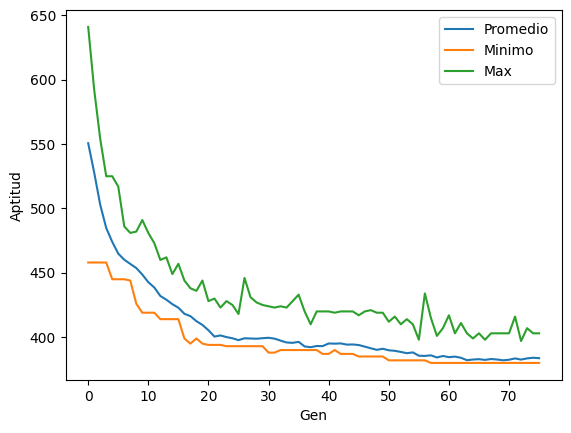

In [11]:
import matplotlib.pyplot as plt

gen, prom, min, max = logbook.select("gen", "promedio", "min", "max")

plt.plot(gen, prom, label="Promedio")
plt.plot(gen, min, label="Minimo")
plt.plot(gen, max, label="Max")
plt.xlabel("Gen")
plt.ylabel("Aptitud")
plt.legend(loc="upper right")
plt.show()